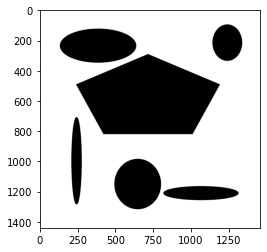

In [39]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread("image.png")
plt.imshow(img)
plt.show()
#Sauvegarder
#mpimg.imsave("resultat.png", img)

In [40]:
img_int = np.zeros((img.shape[0],img.shape[1],1))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 :
            img_int[i][j] = 1
        else:
            img_int[i][j] = 20
print("format img_int ",img_int.shape )
print("format img ",img.shape )
print("Valeur d'un pixel noir, image ",img[600][750])
print("Valeur d'un pixel noir, image int ",img_int[600][750])
print("Valeur d'un pixel blanc, image ",img[1000][1250])
print("Valeur d'un pixel blanc, image int ",img_int[1000][1250])

format img_int  (1440, 1460, 1)
format img  (1440, 1460, 3)
Valeur d'un pixel noir, image  [0. 0. 0.]
Valeur d'un pixel noir, image int  [20.]
Valeur d'un pixel blanc, image  [1. 1. 1.]
Valeur d'un pixel blanc, image int  [1.]


In [41]:
import numpy as np

#Paramètre du problème
autonomie_initiale = 400
position_initiale=(900,600)
copie_milieu = img_int
Milieu = img_int
Distance = 100*np.ones((img_int.shape[0],img_int.shape[1]))

#Paramétrage de la zone et de la matrice déplacement
Distance[position_initiale] = autonomie_initiale

#Initialisation des 8 voisins
Voisins = []
Deplacement_Primaire = [(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0),(-1,1)]
for i in Deplacement_Primaire :
    Voisins.append((position_initiale[0]+i[0],position_initiale[1]+i[1]))
print("Voisins ",Voisins)
   
Voisins=[position_initiale]
print(Voisins)
#Parcours

def affiche():
    print("       Milieu \n", Milieu)
    print("            Distance \n", Distance)
    print("Voisins : ", Voisins)
    return()



Voisins  [(900, 601), (901, 601), (901, 600), (901, 599), (900, 599), (899, 599), (899, 600), (899, 601)]
[(900, 600)]


In [42]:
sommet_initial = Voisins[0]

while len(Voisins) > 0 :
    
    #  1-Partir d'une position sur le graphe
    #  2-Choisir le premier sommet de la pile
    #  3-Annoter les voisins de ce sommet
    #    a) Pour chaque voisins de ce sommet : 
    #      - Il fait partie de la frontière = > rien faire
    #      - Il est inconnu => calculer le déplacement, ajouter à la frontière, se retirer de la liste frontière
    
    sommet_initial = Voisins[0]
    
    for i in Deplacement_Primaire :
        if (0 <= sommet_initial[0]+i[0] <= Distance.shape[0]) and (0 <= sommet_initial[1]+i[1] <= Distance.shape[1]) :
            sommet_cible=((sommet_initial[0]+i[0],sommet_initial[1]+i[1]))
            #print("Je veux aller à ", sommet_cible, " en venant de ", sommet_initial)
            if Distance[sommet_cible] == 100 : # sommet inconnu
                if Distance[sommet_initial]-Milieu[sommet_cible]>=0 : #deplacement possible
                    Distance[sommet_cible] = Distance[sommet_initial]-Milieu[sommet_cible]
                    #print("Litse avant suppression", Voisins)
                    #print("Je retire ", Voisins.pop(0))
                    #print("sommet_cible est ", sommet_cible)
                    if sommet_cible not in Voisins :
                        Voisins.append(sommet_cible)
                        #print("J'ajoute", Voisins.append(sommet_cible))

    
    #print("Test avant Voisins.remove(sommet_initial), sa valeur :", sommet_initial)
    if sommet_initial in Voisins : Voisins.remove(sommet_initial)

print("Graphe parcouru")



Graphe parcouru


<function matplotlib.pyplot.show(close=None, block=None)>

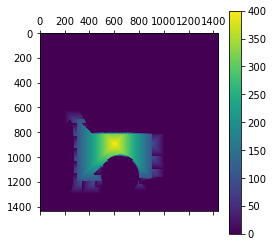

In [74]:
from matplotlib import pyplot as plt
ma_matrice = np.zeros((img_int.shape[0],img_int.shape[0]))
for i in range(Distance.shape[0]-100):
    for j in range(Distance.shape[1]-100):
        if Distance[i][j]==100 :
            ma_matrice[i][j]=0
        else:
            ma_matrice[i][j]=(Distance[i][j])

im1 = plt.matshow(ma_matrice)
plt.colorbar(im1)
plt.show

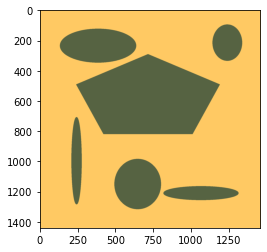

In [86]:
img_colorized = np.zeros((img.shape[0],img.shape[1],3))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j][0] == 1 and img[i][j][1] == 1 and img[i][j][2] == 1 : # Blanc
            img_colorized[i][j][0] = 1
            img_colorized[i][j][1] = 0.79
            img_colorized[i][j][2] = 0.39 # sable
        else: # noir
            img_colorized[i][j][0] = 0.34
            img_colorized[i][j][1] = 0.39
            img_colorized[i][j][2] = 0.26 # vert foncé
plt.imshow(img_colorized)
plt.show()

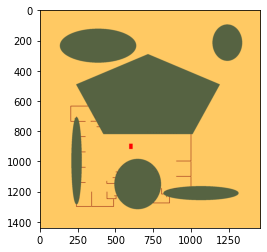

In [90]:
img_iso = img_colorized
for i in range(img_colorized.shape[0]-100):
    for j in range(img_colorized.shape[1]-100):
        if 1 < ma_matrice[i][j] < 5 : 
            img_iso[i][j][0] = max(1,img_iso[i][j][0] + (ma_matrice[i][j]/autonomie_initiale))/2
            img_iso[i][j][1] = img_iso[i][j][1]/10
            img_iso[i][j][2] = img_iso[i][j][2]/10
        if position_initiale[0]*0.98 < i < position_initiale[0]*1.02 and position_initiale[1]*0.98 < j < position_initiale[1]*1.02 :
            img_iso[i][j][0] = 1
            img_iso[i][j][1] = 0
            img_iso[i][j][2] = 0
plt.imshow(img_iso)
plt.show()

In [91]:
import matplotlib.image as mpimg
mpimg.imsave("isochrone.png", img_iso)

In [54]:
max(1,1.1)

1.1

In [60]:
ma_matrice[900][500]

300.0

In [68]:
img.shape[0]-1

1439

In [71]:
i=1440
j=0
ma_matrice[i][j]
img_iso[i][j][0]
ma_matrice[i][j]

IndexError: index 1440 is out of bounds for axis 0 with size 1440